# Przygotowanie Danych

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [342]:
from sklearn.datasets import load_iris

datContent = pd.read_csv("data//spam.dat")
# iris = load_iris()
# datContent = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                         columns= iris['feature_names'] + ['target'])
datContent = datContent.rename(index=str, columns={"target": "K"})

In [343]:
datContent.head()

,ACT_NOW,ADDRESSES_ON_CD,ADULT_SITE,ADVERT_CODE,ADVERT_CODE2,ALL_CAPS_HEADER,ALL_CAP_PORN,ALL_NATURAL,AMATEUR_PORN,AMAZING,...,X_ENC_PRESENT,X_LIBRARY,X_LIST_UNSUBSCRIBE,X_MSMAIL_PRIORITY_HIGH,X_PRECEDENCE_REF,X_PRIORITY_HIGH,X_STORMPOST_TO,X_X_PRESENT,YOUR_INCOME,K
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,no
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,no
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes


In [344]:
datContent.shape

(4789, 463)

# Przegląd modeli

In [345]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def countStats(_y_true, _y_pred):
    accuracy = accuracy_score(_y_true, _y_pred, normalize=True)
    precision = precision_score(_y_true, _y_pred, average='weighted')
    recall = recall_score(_y_true, _y_pred, average='weighted')
    fscore = f1_score(_y_true, _y_pred, average='weighted')
    
    return accuracy, precision, recall, fscore

In [346]:
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.metrics import confusion_matrix

def calculateStats(model, name, data):
    
    ConfusionMatrixY = []
    ConfusionMatrixYpred = []

    tAccuracy = 0
    tPrecision = 0
    tRecall = 0
    tFScore = 0

    for i in range(0, 5):
        kf = KFold(n_splits = 2, shuffle = True)
        result = next(kf.split(data), None)

        train1 = data.iloc[result[0]]
        test1 =  data.iloc[result[1]]
        train2 = data.iloc[result[1]]
        test2 =  data.iloc[result[0]]

        # fold 1
        clf = model
        Xtrain = train1.drop('K', axis = 1)
        Ytrain = train1.K
        clf.fit(Xtrain, Ytrain)

        Xtest = test1.drop('K', axis = 1)
        Ytest = test1.K
        YPred = clf.predict(Xtest)

        ConfusionMatrixY = Ytest.tolist()
        ConfusionMatrixYpred = YPred.tolist()

        accuracy, precision, recall, fscore = countStats(Ytest, YPred)
        tAccuracy += accuracy
        tPrecision += precision
        tRecall += recall
        tFScore += fscore

        #fold 2
        clf = model
        Xtrain = train1.drop('K', axis = 1)
        Ytrain = train1.K
        clf.fit(Xtrain, Ytrain)

        Xtest = test1.drop('K', axis = 1)
        Ytest = test1.K
        YPred = clf.predict(Xtest)

        ConfusionMatrixY = ConfusionMatrixY + Ytest.tolist()
        ConfusionMatrixYpred = ConfusionMatrixYpred + YPred.tolist()

        accuracy, precision, recall, fscore = countStats(Ytest, YPred)
        tAccuracy += accuracy
        tPrecision += precision
        tRecall += recall
        tFScore += fscore

    cm = confusion_matrix(ConfusionMatrixY, ConfusionMatrixYpred)
    return tAccuracy/10, tPrecision/10, tRecall/10, tFScore/10, cm

In [347]:
def plot_cm(cm):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm)
    sns.heatmap(df_cm, cmap="Blues", annot=True)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Macierz konfuzji')

In [348]:
def do_the_thing(model, name, data):
    accuracy, precision, recall, fscore, cm = calculateStats(model, name, data)
    print(f'{name}:\n\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF-score: {fscore}')
    print(f'\nMacierz konfuzji:\n\n{cm}')
    plot_cm(cm)

SVM:

Accuracy: 0.9834655532359081
Precision: 0.983666354038349
Recall: 0.9834655532359081
F-score: 0.9834134134231203

Macierz konfuzji:

[[2962   14]
 [  70 1744]]


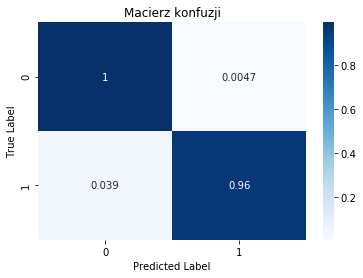

In [349]:
do_the_thing(model=svm.SVC(gamma='scale'), name='SVM', data=datContent)

KNN:

Accuracy: 0.9173277661795407
Precision: 0.9264639710723506
Recall: 0.9173277661795407
F-score: 0.9150303315563824

Macierz konfuzji:

[[3078    2]
 [ 350 1360]]


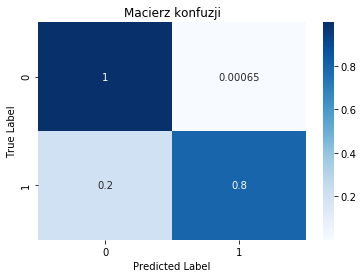

In [350]:
from sklearn.neighbors import KNeighborsClassifier

do_the_thing(KNeighborsClassifier(metric='euclidean'), name='KNN', data=datContent)

Decision Tree:

Accuracy: 0.9741544885177452
Precision: 0.9741705725315057
Recall: 0.9741544885177452
F-score: 0.9741449318963543

Macierz konfuzji:

[[2858   56]
 [  62 1814]]


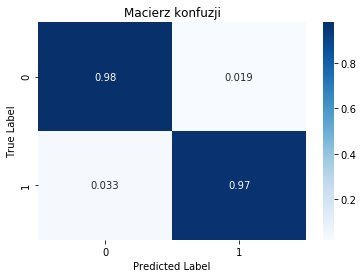

In [351]:
from sklearn.tree import DecisionTreeClassifier

do_the_thing(DecisionTreeClassifier(), name='Decision Tree', data=datContent)

Naive Bayes:

Accuracy: 0.9794572025052192
Precision: 0.979459842372205
Recall: 0.9794572025052192
F-score: 0.9794533721435787

Macierz konfuzji:

[[2962   38]
 [  54 1736]]


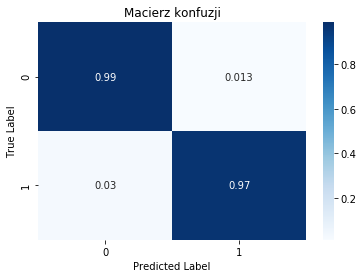

In [352]:
from sklearn.naive_bayes import MultinomialNB

do_the_thing(MultinomialNB(), name='Naive Bayes', data=datContent)

Multi-layer Perceptron:

Accuracy: 0.9795824634655533
Precision: 0.9796027113280813
Recall: 0.9795824634655533
F-score: 0.9795590372358246

Macierz konfuzji:

[[2911   27]
 [  58 1794]]


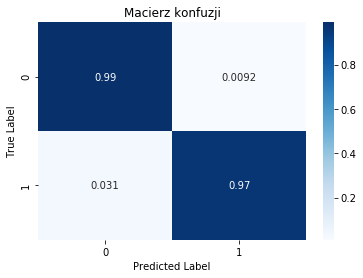

In [353]:
from sklearn.neural_network import MLPClassifier

do_the_thing(MLPClassifier(), name='Multi-layer Perceptron', data=datContent)

# Najlepsze do tej pory

In [354]:
models = {
    'SVM': svm.SVC(gamma='scale'),
    'KNN': KNeighborsClassifier(metric='euclidean'),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Multi-layer Perceptron': MLPClassifier()
}

all_fscores = []

for model in models:
    accuracy, precision, recall, fscore, cm = calculateStats(models[model], model, datContent)
    all_fscores.append(fscore)

d:\programs\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'F-sscore klasyfikatorów')

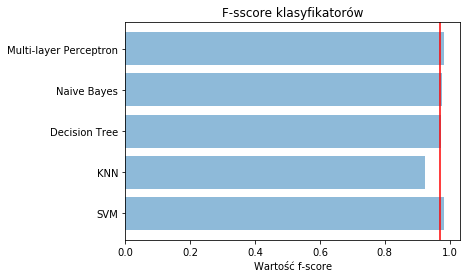

In [355]:
fig = plt.figure()

X = list(models.keys())
Y = all_fscores

plt.barh(X, Y, alpha=0.5)
plt.axvline(x=.97, color='r')
plt.xlabel('Wartość f-score')
plt.title('F-sscore klasyfikatorów')

**Do dalszej części przechodzą**:

 * Naive Bayes
 * Multi-layer Perceptron
 * SVM

# Hiperparametry

In [356]:
models = {
    'SVM': svm.SVC(gamma='scale'),
    'Naive Bayes': MultinomialNB(),
    'Multi-layer Perceptron': MLPClassifier()
}

(0.95, 1.0)

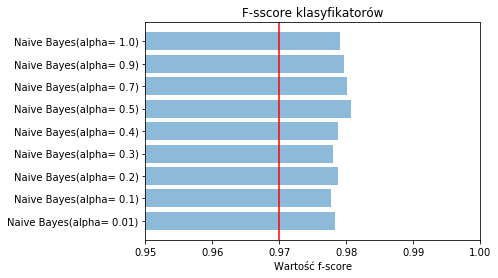

In [357]:
all_fscores = []
names = []
alphas = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 1.0]

for alpha_v in alphas:
    name = 'Naive Bayes(alpha= ' + str(alpha_v) + ')'
    accuracy, precision, recall, fscore, cm = calculateStats(MultinomialNB(alpha=alpha_v), name, datContent)
    all_fscores.append(fscore)
    names.append(name)

fig = plt.figure()

X = names
Y = all_fscores

plt.barh(X, Y, alpha=0.5)
plt.axvline(x=.97, color='r')
plt.xlabel('Wartość f-score')
plt.title('F-sscore klasyfikatorów')
plt.xlim(0.95, 1.0)

Naive Bayes(alpha=0.9):

Accuracy: 0.9807933194154488
Precision: 0.9808200980944571
Recall: 0.9807933194154488
F-score: 0.9807923909052005

Macierz konfuzji:

[[2930   42]
 [  36 1782]]


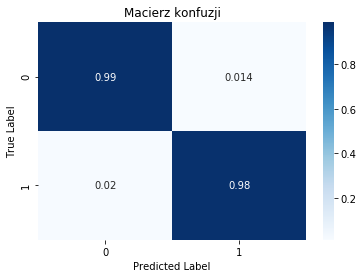

In [358]:
do_the_thing(MultinomialNB(alpha=0.5), name='Naive Bayes(alpha=0.9)', data=datContent)

(0.95, 1.0)

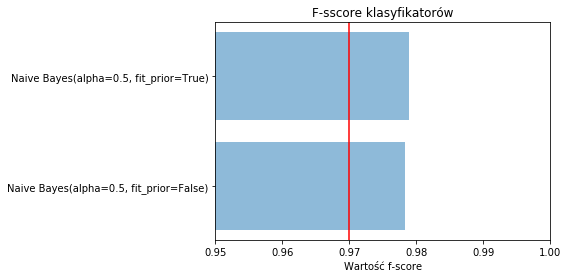

In [360]:
all_fscores = []
names = []
fit_priors = [False, True]

for fit_prior in fit_priors:
    name = 'Naive Bayes(alpha=0.5, fit_prior=' + str(fit_prior) + ')'
    accuracy, precision, recall, fscore, cm = calculateStats(MultinomialNB(alpha=0.5, fit_prior=fit_prior), name, datContent)
    all_fscores.append(fscore)
    names.append(name)

fig = plt.figure()

X = names
Y = all_fscores

plt.barh(X, Y, alpha=0.5)
plt.axvline(x=.97, color='r')
plt.xlabel('Wartość f-score')
plt.title('F-sscore klasyfikatorów')
plt.xlim(0.95, 1.0)

Naive Bayes(alpha=0.5, fit_prior=True):

Accuracy: 0.9786221294363256
Precision: 0.978655604101332
Recall: 0.9786221294363256
F-score: 0.9786314502541

Macierz konfuzji:

[[2956   46]
 [  44 1744]]


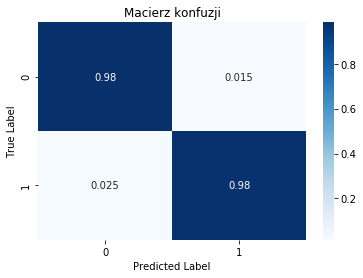

In [364]:
do_the_thing(MultinomialNB(alpha=0.5, fit_prior=True), name='Naive Bayes(alpha=0.5, fit_prior=True)', data=datContent)

(0.95, 1.0)

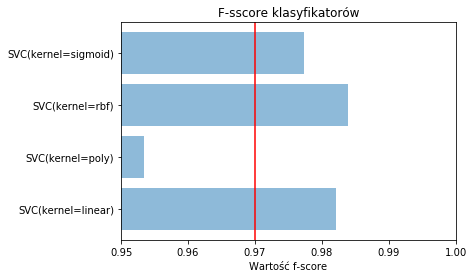

In [365]:
all_fscores = []
names = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    name = 'SVC(kernel=' + str(kernel) + ')'
    accuracy, precision, recall, fscore, cm = calculateStats(svm.SVC(kernel=kernel, gamma='scale'), name, datContent)
    all_fscores.append(fscore)
    names.append(name)

fig = plt.figure()

X = names
Y = all_fscores

plt.barh(X, Y, alpha=0.5)
plt.axvline(x=.97, color='r')
plt.xlabel('Wartość f-score')
plt.title('F-sscore klasyfikatorów')
plt.xlim(0.95, 1.0)

SVC(kernel=linear):

Accuracy: 0.9810438413361169
Precision: 0.9811465746644099
Recall: 0.9810438413361169
F-score: 0.9810031879492771

Macierz konfuzji:

[[2858   12]
 [  80 1840]]


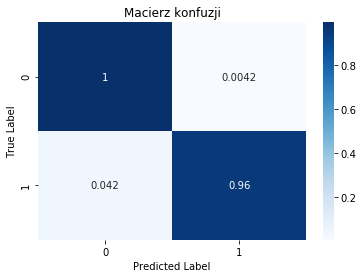

In [366]:
do_the_thing(svm.SVC(kernel='linear', gamma='scale'), name='SVC(kernel=linear)', data=datContent)

SVC(kernel=rbf):

Accuracy: 0.982964509394572
Precision: 0.9830991109110923
Recall: 0.982964509394572
F-score: 0.9829196202504837

Macierz konfuzji:

[[2890   24]
 [  62 1814]]


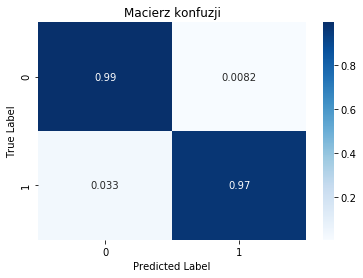

In [367]:
do_the_thing(svm.SVC(kernel='rbf', gamma='scale'), name='SVC(kernel=rbf)', data=datContent)

(0.95, 1.0)

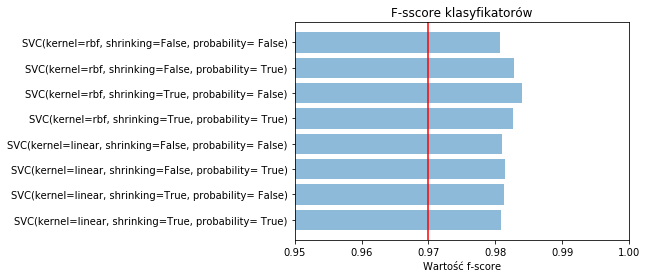

In [368]:
all_fscores = []
names = []
kernels = ['linear', 'rbf']
shrinkings = [True, False]
probabilities = [True, False]


for kernel in kernels:
    for shrinking in shrinkings:
        for probability in probabilities:
            name = 'SVC(kernel=' + str(kernel) + ', shrinking=' + str(shrinking) + ', probability= ' + str(probability) + ')'
            accuracy, precision, recall, fscore, cm = calculateStats(svm.SVC(kernel=kernel, gamma='scale', shrinking=shrinking, probability=probability), name, datContent)
            all_fscores.append(fscore)
            names.append(name)

fig = plt.figure()

X = names
Y = all_fscores

plt.barh(X, Y, alpha=0.5)
plt.axvline(x=.97, color='r')
plt.xlabel('Wartość f-score')
plt.title('F-sscore klasyfikatorów')
plt.xlim(0.95, 1.0)

SVC(kernel=rbf, shrinking=False, probability= False):

Accuracy: 0.9838830897703549
Precision: 0.9840331433599092
Recall: 0.9838830897703549
F-score: 0.9838390619544916

Macierz konfuzji:

[[2922   12]
 [  58 1798]]


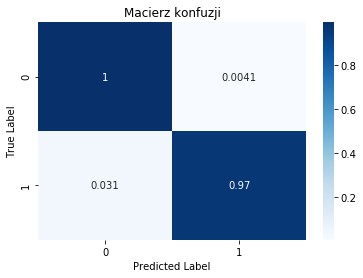

In [369]:
do_the_thing(svm.SVC(kernel='rbf', gamma='scale', shrinking=True, probability= False), name='SVC(kernel=rbf, shrinking=False, probability= False)', data=datContent)

In [370]:
all_fscores = []
names = []
hidden_layer_sizess = [(100,), (100,50,), (50,25,10,)]
activations = ['logistic', 'tanh', 'relu']
solvers = ['lbfgs', 'sgd', 'adam']


for hidden_layer_sizes in hidden_layer_sizess:
    for activation in activations:
        for solver in solvers:
            name = 'MLPClassifier(hidden_layer_sizes=' + str(hidden_layer_sizes) + ', activation=' + str(activation) + ', solver= ' + str(solver) + ')'
            accuracy, precision, recall, fscore, cm = calculateStats(MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver), name, datContent)
            all_fscores.append(fscore)
            names.append(name)

d:\programs\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programs\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programs\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programs\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\p

d:\programs\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python37\lib\site-packages\sklearn\metrics\classification.py

d:\programs\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programs\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programs\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programs\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\p

d:\programs\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programs\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programs\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\programs\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\p

{
    "MLPClassifier(hidden_layer_sizes=(100,), activation=logistic, solver= lbfgs)": 0.9807484231354586,
    "MLPClassifier(hidden_layer_sizes=(100,), activation=logistic, solver= sgd)": 0.8976707533025335,
    "MLPClassifier(hidden_layer_sizes=(100,), activation=logistic, solver= adam)": 0.9800033848474186,
    "MLPClassifier(hidden_layer_sizes=(100,), activation=tanh, solver= lbfgs)": 0.973310549460891,
    "MLPClassifier(hidden_layer_sizes=(100,), activation=tanh, solver= sgd)": 0.9736472399936071,
    "MLPClassifier(hidden_layer_sizes=(100,), activation=tanh, solver= adam)": 0.9782785318191296,
    "MLPClassifier(hidden_layer_sizes=(100,), activation=relu, solver= lbfgs)": 0.9782756042672283,
    "MLPClassifier(hidden_layer_sizes=(100,), activation=relu, solver= sgd)": 0.974883583940587,
    "MLPClassifier(hidden_layer_sizes=(100,), activation=relu, solver= adam)": 0.9816132491432213,
    "MLPClassifier(hidden_layer_sizes=(100, 50), activation=logistic, solver= lbfgs)": 0.98045815

<Figure size 432x288 with 0 Axes>

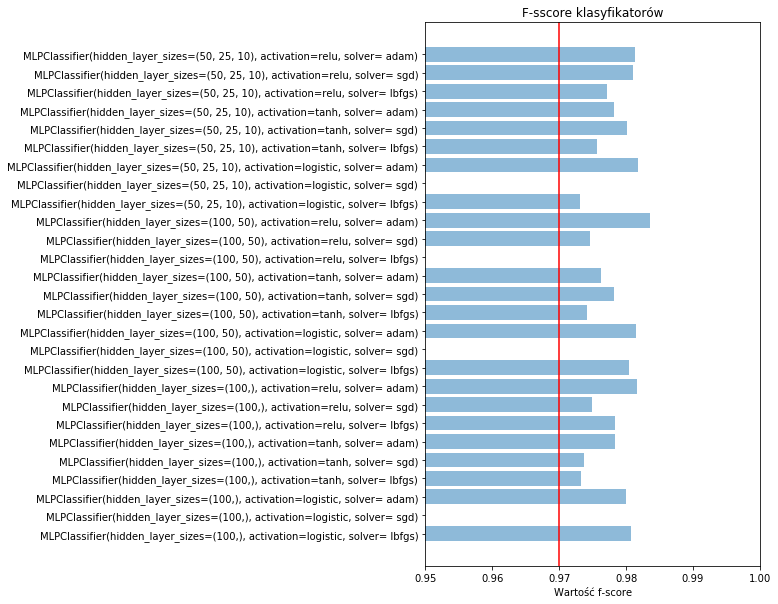

In [372]:
fig = plt.figure()

X = names
Y = all_fscores

data = (X, Y)

plt.figure(figsize=(6, 10))
plt.barh(X, Y, alpha=0.5, align='center')
plt.axvline(x=.97, color='r')
plt.xlabel('Wartość f-score')
plt.title('F-sscore klasyfikatorów')
plt.xlim(0.95, 1.0)

odp = dict(zip(names, all_fscores))
import json
print(json.dumps(odp, indent = 4))

MLPClassifier(hidden_layer_sizes=(100,), activation=relu, solver= adam):

Accuracy: 0.9837160751565761
Precision: 0.9837413317921527
Recall: 0.9837160751565761
F-score: 0.9837075337143913

Macierz konfuzji:

[[2933   25]
 [  55 1777]]


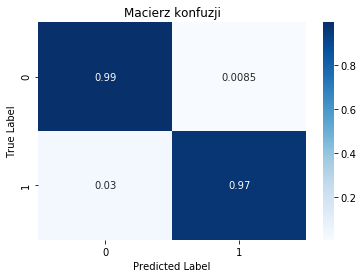

In [373]:
do_the_thing(MLPClassifier(hidden_layer_sizes=(100,50,), activation='relu', solver='adam'), name='MLPClassifier(hidden_layer_sizes=(100,), activation=relu, solver= adam)', data=datContent)

##### Najlepsze klasyfikatory:

 * MultinomialNB(alpha=0.5, fit_prior=True)
 * svm.SVC(kernel='rbf', gamma='scale', shrinking=True, probability= False)
 * MLPClassifier(hidden_layer_sizes=(100,50,), activation='relu', solver='adam')

# Ranking cech

In [374]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

X = datContent.drop('K', axis = 1)
Y = datContent.K
test = SelectKBest(score_func=chi2, k=2)
test.fit(X, Y)

scores = []
num_features = len(X.columns)
for i in range(num_features):
    score = test.scores_[i]
    scores.append((score, X.columns[i]))

sortedFeatures = sorted(scores, reverse = True)
sortedFeatures = list(map(lambda x: x[1], sortedFeatures))

In [375]:
feature_list = range(2, len(sortedFeatures) + 1)
f_scores_NB = []
f_scores_SVM = []
f_scores_MLP = []
best_model_NB = None
best_model_NB_name = None
best_data_NB = []
best_model_SVM = None
best_model_SVM_name = None
best_data_SVM = []
best_model_MLP = None
best_model_MLP_name = None
best_data_MLP = []

for feature in feature_list:
    subData = None
    subData = datContent.copy()
    for dropedFeatureIndex in range (feature, len(sortedFeatures)):
        subData = subData.drop(sortedFeatures[dropedFeatureIndex], axis=1)

    nameNB = 'MultinomialNB(alpha=0.5, fit_prior=True)'
    modelNB = MultinomialNB(alpha=0.5, fit_prior=True)
    accuracyNB, precisionNB, recallNB, fscoreNB, cmNB = calculateStats(modelNB, name, subData)
    f_scores_NB.append(fscoreNB)
    if fscoreNB >= max(f_scores_NB):
        best_model_NB = modelNB
        best_model_NB_name = nameNB
        best_data_NB = subData.copy()
    
    
    nameSVM = 'SVC(kernel=rbf, gamma=scale, shrinking=True, probability= False)'
    modelSVM = svm.SVC(kernel='rbf', gamma='scale', shrinking=True, probability= False)
    accuracySVM, precisionSVM, recallSVM, fscoreSVM, cmSVM = calculateStats(modelSVM, name, subData)
    f_scores_SVM.append(fscoreSVM)
    if fscoreSVM >= max(f_scores_SVM):
        best_model_SVM = modelSVM
        best_model_SVM_name = nameSVM
        best_data_SVM = subData.copy()
    
    nameMLP = 'MLPClassifier(hidden_layer_sizes=(100,50,), activation=relu, solver=adam)'
    modelMLP = MLPClassifier(hidden_layer_sizes=(100,50,), activation='relu', solver='adam')
    accuracyMLP, precisionMLP, recallMLP, fscoreMLP, cmMLP = calculateStats(modelMLP, name, subData)
    f_scores_MLP.append(fscoreMLP)
    if fscoreMLP >= max(f_scores_MLP):
        best_model_MLP = modelMLP
        best_model_MLP_name = nameMLP
        best_data_MLP = subData.copy()
    
    print(f'{subData.shape[1]}/{len(sortedFeatures) + 1}')
    

d:\programs\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python37\lib\site-packages\sklearn\metrics\classification.py

3/463


d:\programs\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python37\lib\site-packages\sklearn\metrics\classification.py

4/463
5/463
6/463
7/463
8/463
9/463
10/463
11/463
12/463
13/463
14/463
15/463
16/463
17/463
18/463
19/463
20/463
21/463
22/463
23/463
24/463
25/463
26/463
27/463
28/463
29/463
30/463
31/463
32/463
33/463
34/463
35/463
36/463
37/463
38/463
39/463
40/463
41/463
42/463
43/463
44/463
45/463
46/463
47/463
48/463
49/463
50/463
51/463
52/463
53/463
54/463
55/463
56/463
57/463
58/463
59/463
60/463
61/463
62/463
63/463
64/463
65/463
66/463
67/463
68/463
69/463
70/463
71/463
72/463
73/463
74/463
75/463
76/463
77/463
78/463
79/463
80/463
81/463
82/463
83/463
84/463
85/463
86/463
87/463
88/463
89/463
90/463
91/463
92/463
93/463
94/463
95/463
96/463
97/463
98/463
99/463
100/463
101/463
102/463
103/463
104/463
105/463
106/463
107/463
108/463
109/463
110/463
111/463
112/463
113/463
114/463
115/463
116/463
117/463
118/463
119/463
120/463
121/463
122/463
123/463
124/463
125/463
126/463
127/463
128/463
129/463
130/463
131/463
132/463
133/463
134/463
135/463
136/463
137/463
138/463
139/463
140/463
141/46

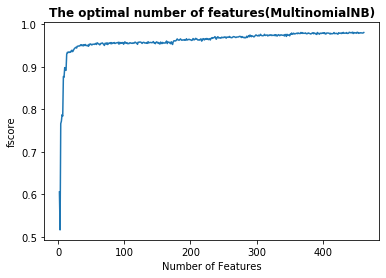

In [376]:
plt.figure()
plt.title('The optimal number of features(MultinomialNB)', fontweight='bold')
plt.xlabel('Number of Features')
plt.ylabel('fscore',)
plt.plot(feature_list, f_scores_NB)

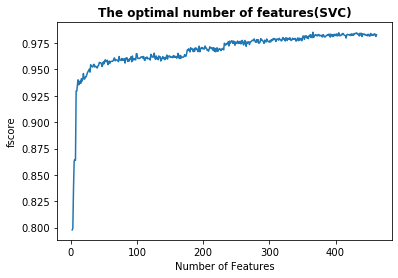

In [377]:
plt.figure()
plt.title('The optimal number of features(SVC)', fontweight='bold')
plt.xlabel('Number of Features')
plt.ylabel('fscore',)
plt.plot(feature_list, f_scores_SVM)

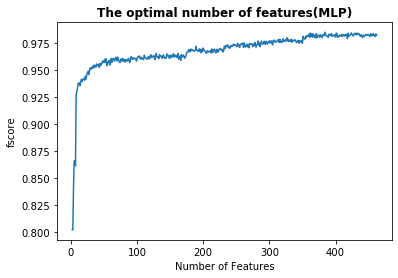

In [378]:
plt.figure()
plt.title('The optimal number of features(MLP)', fontweight='bold')
plt.xlabel('Number of Features')
plt.ylabel('fscore',)
plt.plot(feature_list, f_scores_MLP)

# Nalepsza ilość dla każdego

In [379]:
# Przygotowanie zbiorów dla kazdego klasyfikatora

# Ensamble

In [ ]:
from sklearn.ensemble import BaggingClassifier

f_scores_NB = []
f_scores_SVM = []
f_scores_MLP = []

best_model_NB_Bag = None
best_model_SVM_Bag = None
best_model_MLP_Bag = None
best_model_NB_Bag_name = None
best_model_SVM_Bag_name = None
best_model_MLP_Bag_name = None

models_list =  range(2,20)

for num_of_models in models_list:

    model_NB = BaggingClassifier(base_estimator=best_model_NB, n_estimators=num_of_models)
    name = 'Bagging_' + str(num_of_models) + '_' + best_model_NB_name
    accuracyNB, precisionNB, recallNB, fscoreNB, cmNB = calculateStats(model_NB, name, best_data_NB)
    f_scores_NB.append(fscoreNB)
    if fscoreNB >= max(f_scores_NB):
        best_model_NB_Bag = modelNB
        best_model_NB_Bag_name = name
    
    model_SVM = BaggingClassifier(base_estimator=best_model_SVM, n_estimators=num_of_models)
    name = 'Bagging_' + str(num_of_models) + '_' + best_model_SVM_name
    accuracySVM, precisionSVM, recallSVM, fscoreSVM, cmSVM = calculateStats(model_SVM, name, best_data_SVM)
    f_scores_SVM.append(fscoreSVM)
    if fscoreSVM >= max(f_scores_SVM):
        best_model_SVM_Bag = modelSVM
        best_model_SVM_Bag_name = name
    
    model_MLP = BaggingClassifier(base_estimator=best_model_MLP, n_estimators=num_of_models)
    name = 'Bagging_' + str(num_of_models) + '_' + best_model_MLP_name
    accuracyMLP, precisionMLP, recallMLP, fscoreMLP, cmMLP = calculateStats(model_MLP, name, best_data_MLP)
    f_scores_MLP.append(fscoreMLP)
    if fscoreMLP >= max(f_scores_MLP):
        best_model_MLP_Bag = modelMLP
        best_model_MLP_Bag_name = name
    

In [ ]:
plt.figure()
plt.title('The optimal number of models(MultinomialNB) for Bagging', fontweight='bold')
plt.xlabel('Number of models')
plt.ylabel('fscore',)
plt.plot(models_list, f_scores_NB)

In [ ]:
plt.figure()
plt.title('The optimal number of models(SVC) for Bagging', fontweight='bold')
plt.xlabel('Number of models')
plt.ylabel('fscore',)
plt.plot(models_list, f_scores_SVM)

In [ ]:
plt.figure()
plt.title('The optimal number of models(MLP) for Bagging', fontweight='bold')
plt.xlabel('Number of models')
plt.ylabel('fscore',)
plt.plot(models_list, f_scores_MLP)

In [ ]:
do_the_thing(model=best_model_NB_Bag, name=best_model_NB_Bag_name, data=best_data_NB)

In [ ]:
do_the_thing(model=best_model_SVM_Bag, name=best_model_SVM_Bag_name, data=best_data_SVM)

In [ ]:
do_the_thing(model=best_model_MLP_Bag, name=best_model_MLP_Bag_name, data=best_data_MLP)

In [ ]:
from sklearn.ensemble import VotingClassifier

# best_model_NB = None
# best_model_SVM = None
# best_model_MLP = None

f_scores_NB = []
f_scores_SVM = []
f_scores_MLP = []

best_model_NB_Vote, best_model_SVM_Vote, best_model_MLP_Vote = None, None, None
best_model_NB_Vote_name, best_model_NB_Vote_name, best_model_NB_Vote_name = None, None, None

names = []
all_fscores = []

type_of_votes =  ['soft', 'hard']

for type_of_vote in type_of_votes:
    
    model_NB = VotingClassifier(estimators=[(best_model_NB_name, best_model_NB), (best_model_SVM_name, best_model_SVM), (best_model_MLP_name, best_model_MLP)], voting=type_of_vote)
    name_NB = 'VotingClassifier_NB_data_' + str(type_of_vote)
    names.append(name_NB)
    accuracyNB, precisionNB, recallNB, fscoreNB, cmNB = calculateStats(model, name, best_data_NB)
    all_fscores.append(fscoreNB)
    f_scores_NB.append(fscoreNB)
    if fscoreNB >= max(f_scores_NB):
        best_model_NB_Vote = modelNB
        best_model_NB_Vote_name = name_NB

    model_SVM = VotingClassifier(estimators=[(best_model_NB_name, best_model_NB), (best_model_SVM_name, best_model_SVM), (best_model_MLP_name, best_model_MLP)], voting=type_of_vote)
    name_SVM = 'VotingClassifier_SVM_data_' + str(type_of_vote)
    names.append(name_SVM)
    accuracySVM, precisionSVM, recallSVM, fscoreSVM, cmSVM = calculateStats(model, name, best_data_SVM)
    all_fscores.append(fscoreSVM)
    f_scores_SVM.append(fscoreSVM)
    if fscoreSVM >= max(f_scores_SVM):
        best_model_SVM_Vote = modelSVM
        best_model_SVM_Vote_name = name_SVM

    model_MLP = VotingClassifier(estimators=[(best_model_NB_name, best_model_NB), (best_model_SVM_name, best_model_SVM), (best_model_MLP_name, best_model_MLP)], voting=type_of_vote)
    name_MLP = 'VotingClassifier_MLP_data_' + str(type_of_vote)
    names.append(name_MLP)
    accuracyMLP, precisionMLP, recallMLP, fscoreMLP, cmMLP = calculateStats(model, name, best_data_MLP)
    all_fscores.append(fscoreMLP)
    f_scores_MLP.append(fscoreMLP)
    if fscoreMLP >= max(f_scores_MLP):
        best_model_MLP_Vote = modelMLP
        best_model_MLP_Vote_name = name_MLP
    

In [ ]:
fig = plt.figure()

X = names
Y = all_fscores

plt.barh(X, Y, alpha=0.5)
plt.axvline(x=.97, color='r')
plt.xlabel('Wartość f-score')
plt.title('F-sscore klasyfikatorów')
plt.xlim(0.95, 1.0)

In [ ]:
# teraz najelpszy model z votu i tyle, potem sprawko